In [ ]:
#  Moment of inertia calculation

from sympy import *


# I beam without bottom

# top section (constant)
I_top = 1/12 * 0.800 * 0.01**3
Area_top = 0.800 * 0.01 # Area of the top portion
middle_height = 0.289
bottom_width = 0.005

# middle_height, bottom_width = symbols('middle_height bottom_width', positive=True)

# Symbols of all unknowns and bottom section
I, I_middle, Area_middle, com_y_middle, com_y_top, com_y_bottom, com_y, Area_bottom, I_bottom = symbols('I I_middle Area_middle com_y_middle com_y_top com_y_bottom com_y Area_bottom I_bottom')

# middle section
eq1 = Eq(I_middle, 1/12 * 0.01 * middle_height**3)
# middle area
eq2 = Eq(Area_middle, 0.01 * middle_height)
# bottom section
eqbot = Eq(I_bottom, 1/12 * bottom_width * 0.01**3)
# bottom area
eqbot_area = Eq(Area_bottom, bottom_width * 0.01)
# center of mass y direction (assume symmetric around y axis)
eq3 = Eq(com_y_middle, middle_height/2)
eq4 = Eq(com_y_top, com_y_middle + middle_height/2 + 0.01/2)
eqbot_y = Eq(com_y_bottom, -0.01/2)
# Overall center of mass
eq5 = Eq(com_y, (Area_top * com_y_top + Area_middle * com_y_middle + Area_bottom * com_y_bottom) / (Area_top + Area_middle + Area_bottom))
# Moment of inertia around the center of mass
eq6 = Eq(I, I_top + I_middle + I_bottom + Area_top * (com_y_top - com_y)**2 + Area_middle * (com_y_middle - com_y)**2 + Area_bottom * (com_y_bottom - com_y)**2)

sol = solve([eq1, eq2, eqbot, eqbot_area, eq3, eq4, eqbot_y, eq5, eq6], [I, Area_middle, Area_bottom, com_y_middle, com_y_top, com_y_bottom, com_y, I_bottom, I_middle])
# print I moment of inertia
print(sol[0][0]) 
print(sol[0][0]*10**8)


7.09795112896100e-5
7097.95112896100


C:\Users\imane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\imane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
C:\Users\imane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


Optimal middle height: 293.6291417037477 mm
Optimal bottom width: 0.27255019554553694 mm
Minimum Area: 10939.016918992931 mm^2
Moment of Inertia achieved: 7085.640476117162 mm^4


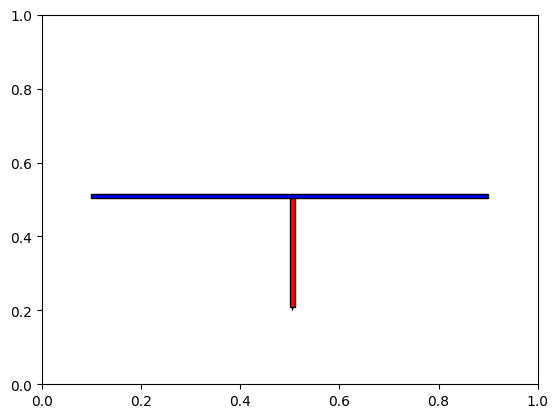

In [1]:
# Moment of Inertia Optimization
from sympy import symbols, Eq, solve
from sympy.utilities.lambdify import lambdify
from scipy.optimize import minimize

# Variables
middle_height, bottom_width = symbols('middle_height bottom_width', positive=True)

# Fixed values
limb_width = 0.01
top_width = 0.800
I_top = 1/12 * top_width * limb_width**3
Area_top = top_width * limb_width

# Define all equations (same as before)
I, I_middle, Area_middle, com_y_middle, com_y_top, com_y_bottom, com_y, Area_bottom, I_bottom = symbols('I I_middle Area_middle com_y_middle com_y_top com_y_bottom com_y Area_bottom I_bottom')

eq1 = Eq(I_middle, 1/12 * limb_width * middle_height**3)
eq2 = Eq(Area_middle, limb_width * middle_height)
eqbot = Eq(I_bottom, 1/12 * bottom_width * limb_width**3)
eqbot_area = Eq(Area_bottom, bottom_width * limb_width)
eq3 = Eq(com_y_middle, middle_height/2)
eq4 = Eq(com_y_top, com_y_middle + middle_height/2 + limb_width/2)
eqbot_y = Eq(com_y_bottom, -limb_width/2)
eq5 = Eq(com_y, (Area_top * com_y_top + Area_middle * com_y_middle + Area_bottom * com_y_bottom) / (Area_top + Area_middle + Area_bottom))
eq6 = Eq(I, I_top + I_middle + I_bottom + Area_top * (com_y_top - com_y)**2 + Area_middle * (com_y_middle - com_y)**2 + Area_bottom * (com_y_bottom - com_y)**2)

# Solve for I, Area_middle, Area_bottom
sol = solve([eq1, eq2, eqbot, eqbot_area, eq3, eq4, eqbot_y, eq5, eq6], [I, Area_middle, Area_bottom, com_y_middle, com_y_top, com_y_bottom, com_y, I_bottom, I_middle])

I_expr = sol[0][0]
Area_middle_expr = sol[0][1]
Area_bottom_expr = sol[0][2]

# Convert to numerical functions
I_func = lambdify((middle_height, bottom_width), I_expr)
Area_middle_func = lambdify(middle_height, Area_middle_expr)
Area_bottom_func = lambdify(bottom_width, Area_bottom_expr)

# Objective: minimize total area
def objective(vars):
    mh, bw = vars
    return Area_top + Area_middle_func(mh) + Area_bottom_func(bw)

# Constraint: I >= 7000
def constraint(vars):
    mh, bw = vars
    return I_func(mh, bw) - 0.00007083  # 7000 cm^4 = 0.00007 m^4

# Optimization
cons = {'type': 'ineq', 'fun': constraint}
bounds = [(0.0001, 0.5), (0.000001, 0.8)]  # Reasonable bounds
result = minimize(objective, x0=[300, 0.0001], bounds=bounds, constraints=cons)

print("Optimal middle height:", result.x[0]*10**3, "mm")
print("Optimal bottom width:", result.x[1]*10**3, "mm")
print("Minimum Area:", objective(result.x)*10**6, "mm^2")
print("Moment of Inertia achieved:", I_func(result.x[0], result.x[1])*10**8, "mm^4")

# draw in matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

optimal_mh = result.x[0]
optimal_bw = result.x[1]

fig, ax = plt.subplots()
rect_top = Rectangle(((1-top_width)/2, optimal_mh+limb_width+0.2), top_width, limb_width, edgecolor='black', facecolor='blue')
rect_middle = Rectangle(((1-top_width)/2+top_width/2, limb_width+0.2), limb_width, optimal_mh, edgecolor='black', facecolor='red')
rect_bottom = Rectangle(((1-top_width)/2+top_width/2-optimal_bw/2+limb_width/2, 0.2), optimal_bw, limb_width, edgecolor='black', facecolor='green')
ax.add_patch(rect_top)
ax.add_patch(rect_middle)
ax.add_patch(rect_bottom)
